Import all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data set

In [2]:
df = pd.read_csv("/content/car_evaluation.csv")
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Checking the informations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [4]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome'], dtype='object')

Checking the null value

In [5]:
df.isnull().any()

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
outcome     False
dtype: bool

In [6]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

Descriptive analysis

In [7]:
df.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.989583
std,1.118358,1.627039
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,6.000000
max,5.000000,6.000000


In [8]:
df.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

**Lable encoding**

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
columns=["buying","maint","lug_boot","safety","outcome"]
df[columns]=df[columns].apply(le.fit_transform)

In [16]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2


Data visualizations

<Axes: >

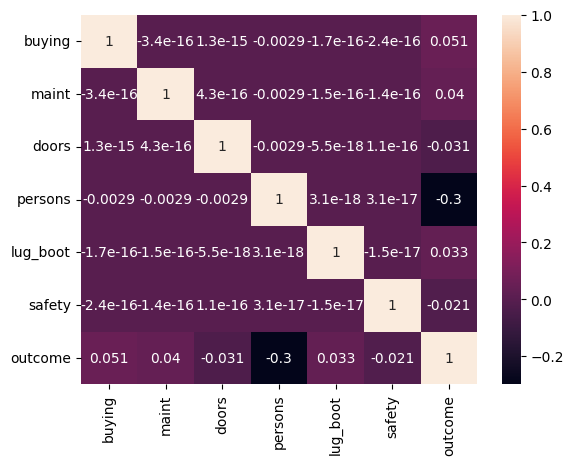

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df.corr()

,buying,maint,doors,persons,lug_boot,safety,outcome
buying,1.000000e+00,-3.436808e-16,1.345683e-15,-2.863990e-03,-1.691262e-16,-2.439415e-16,0.051424
maint,-3.436808e-16,1.000000e+00,4.343748e-16,-2.863990e-03,-1.549092e-16,-1.404810e-16,0.040194
doors,1.345683e-15,4.343748e-16,1.000000e+00,-2.863990e-03,-5.489739e-18,1.088094e-16,-0.031327
persons,-2.863990e-03,-2.863990e-03,-2.863990e-03,1.000000e+00,3.096134e-18,3.134836e-17,-0.299043
lug_boot,-1.691262e-16,-1.549092e-16,-5.489739e-18,3.096134e-18,1.000000e+00,-1.541976e-17,0.033184
safety,-2.439415e-16,-1.404810e-16,1.088094e-16,3.134836e-17,-1.541976e-17,1.000000e+00,-0.021044
outcome,5.142422e-02,4.019365e-02,-3.132740e-02,-2.990429e-01,3.318432e-02,-2.104372e-02,1.000000


splitting dependent and independent varaibles

In [19]:
x=df.drop(columns="outcome")
y=df["outcome"]

In [20]:
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [21]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: outcome, dtype: int64

train test split

In [22]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

MOdel Building

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
y_pred=knn.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 3, 2, 0, 0, 2, 2, 2, 1, 2, 3, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 3, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 3, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,

In [27]:
y_test

1318    2
124     2
648     2
249     2
1599    2
       ..
1481    3
1327    2
317     0
142     2
427     0
Name: outcome, Length: 346, dtype: int64

In [28]:
knn.predict([[3,3,2,2,2,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [29]:
knn.predict([[1,1,5,6,0,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

Evaluations

In [30]:
from sklearn.metrics import accuracy_score,classification_report

In [31]:
accuracy_score(y_pred,y_test)

0.9075144508670521

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        79
           1       0.62      0.29      0.40        17
           2       0.95      0.98      0.97       240
           3       0.90      0.90      0.90        10

    accuracy                           0.91       346
   macro avg       0.82      0.75      0.77       346
weighted avg       0.90      0.91      0.90       346



In [33]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3
outcome,,,,
0,64,3,11,1
1,11,5,1,0
2,4,0,236,0
3,1,0,0,9


**Handle the imbalnced data and build our model**

In [35]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [37]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
y_train.value_counts()

2    970
0    305
3     55
1     52
Name: outcome, dtype: int64

Balancing the dataset

In [38]:
y_train_smote.value_counts()

2    970
0    970
1    970
3    970
Name: outcome, dtype: int64

**MOdel Building on balalnced dataset**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_smote=KNeighborsClassifier()
knn_smote.fit(x_train_smote,y_train_smote)


KNeighborsClassifier()

In [41]:
y_pred1=knn_smote.predict(x_test)
accuracy_score(y_pred1,y_test)

0.846820809248555

In [42]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        79
           1       0.69      0.65      0.67        17
           2       0.97      0.88      0.92       240
           3       0.60      0.60      0.60        10

    accuracy                           0.85       346
   macro avg       0.72      0.74      0.73       346
weighted avg       0.87      0.85      0.85       346



In [43]:
pd.crosstab(y_test,y_pred1)

col_0,0,1,2,3
outcome,,,,
0,65,4,7,3
1,6,11,0,0
2,27,1,211,1
3,4,0,0,6
